 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns
whale_df = pd.read_csv(Path('whale_returns.csv'), index_col="Date", infer_datetime_format=True, parse_dates=True)

In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [5]:
# Reading algorithmic returns
algo_returns = pd.read_csv(Path('algo_returns.csv'), index_col="Date", infer_datetime_format=True, parse_dates=True)

In [6]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns.dropna(inplace=True)

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P TSX 60 Closing Prices
TSX60_hist = pd.read_csv(Path('sp_tsx_history.csv'), index_col="Date", infer_datetime_format=True, parse_dates=True)

In [9]:
# Check Data Types
TSX60_hist.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
TSX60_hist["Close"] = TSX60_hist["Close"].str.replace("$", "")
TSX60_hist["Close"] = TSX60_hist["Close"].str.replace(",", "")
TSX60_hist["Close"] = TSX60_hist["Close"].astype("float")
TSX60_hist.dtypes

<ipython-input-10-704628cc8652>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  TSX60_hist["Close"] = TSX60_hist["Close"].str.replace("$", "")


Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
TSX_returns = TSX60_hist.pct_change()

In [12]:
# Drop nulls
TSX_returns.dropna(inplace=True)

In [13]:
# Rename `Close` Column to be specific to this portfolio.
TSX_returns.rename(columns={'Close' : 'TSX 60'}, inplace=True)
TSX_returns.head()

,TSX 60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([TSX_returns, whale_df, algo_returns], axis='columns', join='inner')
combined_df.tail()

,TSX 60,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,
2019-04-25,-0.000628,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247
2019-04-26,0.002254,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256
2019-04-29,-0.000788,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829
2019-04-30,-0.001183,-0.001295,-0.002211,-0.000259,-0.003702,-0.002944,-0.001570
2019-05-01,-0.004703,-0.005847,-0.001341,-0.007936,-0.007833,0.000094,-0.007358


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

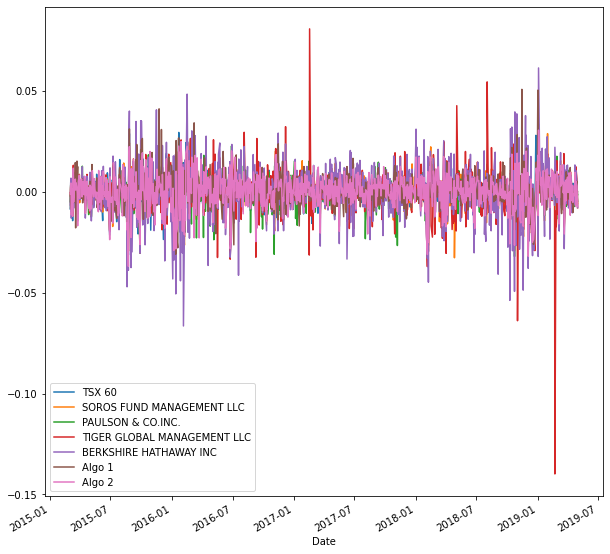

In [15]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(10,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

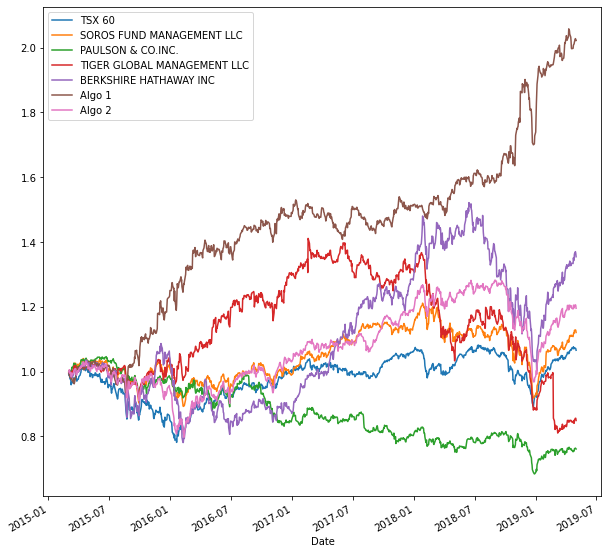

In [16]:
# Calculate cumulative returns of all portfolios
cum_returns = np.cumprod(1 + combined_df, axis=0)

# Plot cumulative returns
cum_returns.plot(figsize=(10,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

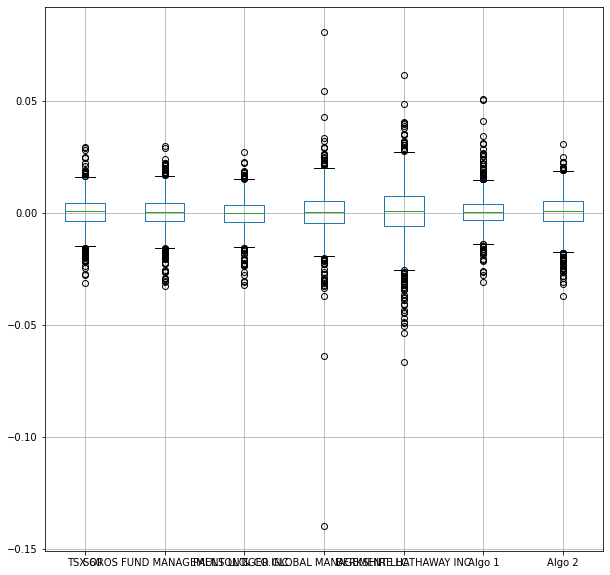

In [17]:
# Box plot to visually show risk
combined_df.boxplot(figsize=(10,10))

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_df.std()
daily_std


TSX 60                         0.007034
SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [19]:
# Calculate  the daily standard deviation of S&P TSX 60
print(f'Daily Standard Deviation of S&P TSX 60 = {daily_std["TSX 60"]}')
# Determine which portfolios are riskier than the S&P TSX 60
high_risk_port = []
for i in range(0,daily_std.count()):
    if daily_std[i] > daily_std['TSX 60']:
        high_risk_port.append(daily_std.index[i])

print(f'Portfolios with higher risk than S&P TSX 60 are:')
for x in high_risk_port:
    print(f'{x}')

Daily Standard Deviation of S&P TSX 60 = 0.007034167748577725
Portfolios with higher risk than S&P TSX 60 are:
SOROS FUND MANAGEMENT LLC
TIGER GLOBAL MANAGEMENT LLC
BERKSHIRE HATHAWAY INC
Algo 1
Algo 2


### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
print(annualized_std)

TSX 60                         0.111664
SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

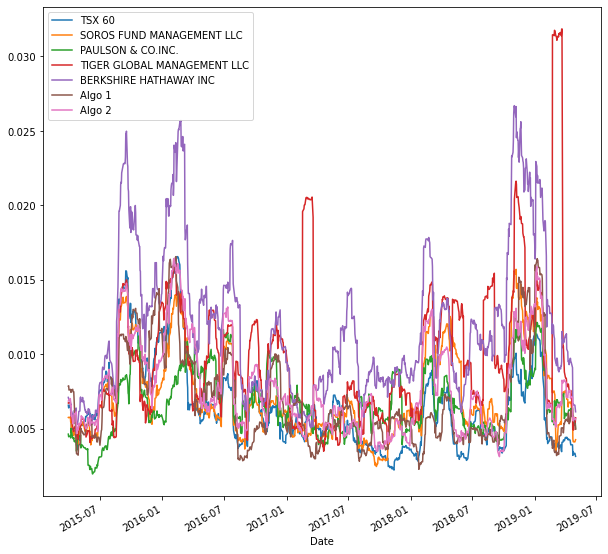

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_std_21 = combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
combined_std_21.plot(figsize=(10,10))

### Calculate and plot the correlation

<AxesSubplot:>

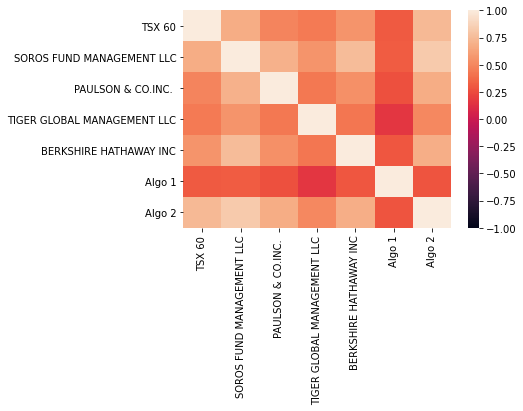

In [22]:
# Calculate the correlation
correlation = combined_df.corr()

# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

Covariance of algo1 relative to TSX 60 is 0.00001656.
Variance of TSX 60 is 0.00004948.
Beta of algo 1 is 0.3347.


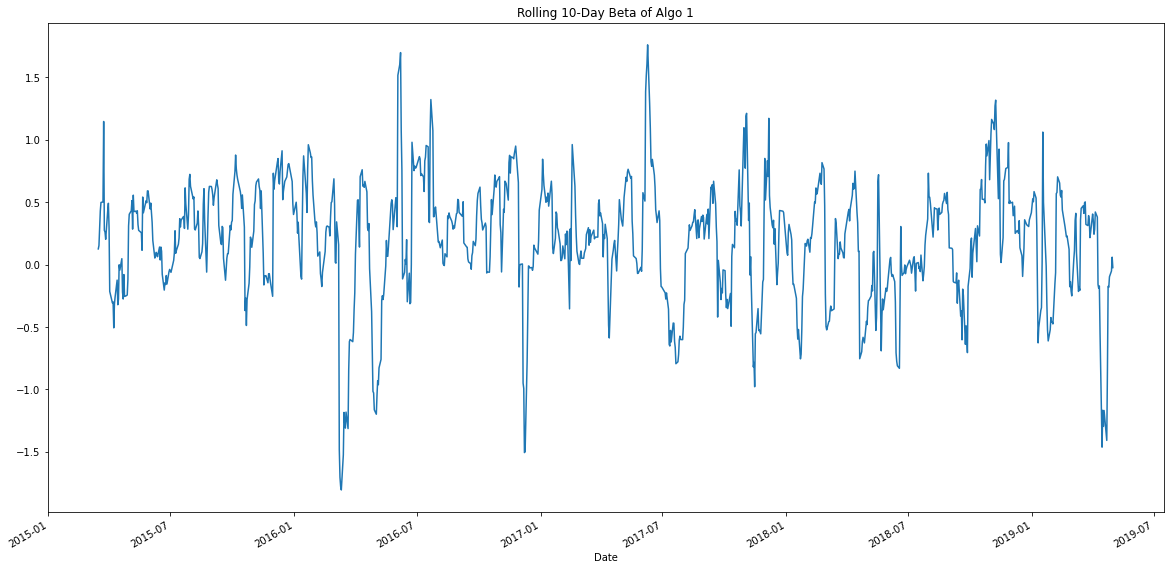

In [23]:
# Calculate covariance of a single portfolio
covariance_matrix = combined_df.cov()
# Get the covariance relative to TSX 60 only
covar_algo1_vs_tsx = covariance_matrix.loc['TSX 60']['Algo 1']
print(f'Covariance of algo1 relative to TSX 60 is {"{0:.8f}".format(covar_algo1_vs_tsx)}.')
# Calculate variance of S&P TSX
variance_tsx = combined_df['TSX 60'].var()
print(f'Variance of TSX 60 is {"{0:.8f}".format(variance_tsx)}.')
# Computing beta
algo1_beta = covar_algo1_vs_tsx / variance_tsx
print(f'Beta of algo 1 is {"{0:.4f}".format(algo1_beta)}.')

# Plot beta trend
# Calculate 10-day rolling covariance of algo 1 vs. TSX 60
rolling_covariance = combined_df["Algo 1"].rolling(window=10).cov(combined_df["TSX 60"])
# Calculate 10-day rolling variance of TSX 60
rolling_variance = combined_df["TSX 60"].rolling(window=10).var()
# Calculate 10-day rolling beta of algo 1 and plot the data
rolling_beta = rolling_covariance / rolling_variance
ax = rolling_beta.plot(figsize=(20, 10), title="Rolling 10-Day Beta of Algo 1")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [25]:
# Use `ewm` to calculate the rolling window
combined_df.ewm(halflife='21 days', times=combined_df.index).mean()

,TSX 60,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,-0.008530,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949
2015-03-04,-0.005908,0.000511,-0.000802,-0.001532,-0.001089,-0.005320,0.000761
2015-03-05,-0.003410,0.001718,0.000878,-0.000193,0.001603,-0.003817,0.001988
2015-03-06,-0.005133,-0.000808,-0.000291,-0.002369,-0.002256,-0.004116,-0.001542
2015-03-09,-0.005452,-0.000496,0.000724,-0.000524,-0.002121,-0.004415,-0.000903
...,...,...,...,...,...,...,...
2019-04-25,0.001036,0.001442,-0.000019,-0.000738,0.001975,0.000432,0.000835
2019-04-26,0.001092,0.001751,0.000404,-0.000134,0.002365,0.000549,0.001039
2019-04-29,0.001001,0.001727,0.000516,0.000175,0.002504,0.000775,0.001126


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

Text(0, 0.5, 'Sharpe Ratio')

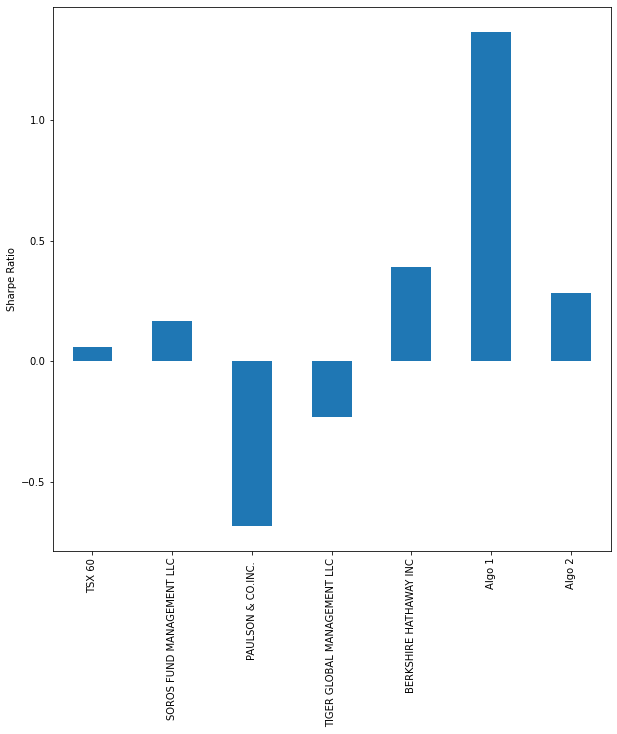

In [27]:
# Annualized Sharpe Ratios
sharpe_ratios = ((combined_df.mean() * 252)-0.015) / (combined_df.std() * np.sqrt(252))
ax = sharpe_ratios.plot(kind='bar', figsize=(10,10))
ax.set_ylabel("Sharpe Ratio")

In [ ]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Yes. Because it has best 1st and 3rd returns and ranked 3rd and 4th in annualized risk. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [28]:
# Reading data from 1st stock
jpm_prices = pd.read_csv(Path('jpm_historical.csv'), index_col="Date", infer_datetime_format=True, parse_dates=True)
jpm_prices.rename(columns={'Close' : 'JPM'}, inplace=True)
jpm_prices.index = jpm_prices.index.normalize()
jpm_prices.head()

,JPM
Date,
2015-04-30,63.26
2015-05-01,63.61
2015-05-04,64.72
2015-05-05,64.40
2015-05-06,63.92


In [29]:
# Reading data from 2nd stock
nvda_prices = pd.read_csv(Path('nvda_historical.csv'), index_col="Date", infer_datetime_format=True, parse_dates=True)
nvda_prices.rename(columns={'Close' : 'NVDA'}, inplace=True)
nvda_prices.index = nvda_prices.index.normalize()
nvda_prices.head()

,NVDA
Date,
2015-04-30,5.55
2015-05-01,5.69
2015-05-04,5.65
2015-05-05,5.51
2015-05-06,5.53


In [30]:
# Reading data from 3rd stock
hrl_prices = pd.read_csv(Path('hrl_historical.csv'), index_col="Date", infer_datetime_format=True, parse_dates=True)
hrl_prices.rename(columns={'Close' : 'HRL'}, inplace=True)
hrl_prices.index = hrl_prices.index.normalize()
hrl_prices.head()

,HRL
Date,
2015-04-30,27.18
2015-05-01,27.64
2015-05-04,27.87
2015-05-05,27.82
2015-05-06,27.55


In [31]:
# Combine all stocks in a single DataFrame
combined_three_stocks = pd.concat([jpm_prices, nvda_prices, hrl_prices], axis='columns', join='inner')
combined_three_stocks.head()

,JPM,NVDA,HRL
Date,,,
2015-04-30,63.26,5.55,27.18
2015-05-01,63.61,5.69,27.64
2015-05-04,64.72,5.65,27.87
2015-05-05,64.40,5.51,27.82
2015-05-06,63.92,5.53,27.55


In [32]:
# Calculate daily returns
three_stocks_dreturns = combined_three_stocks.pct_change()
# Drop NAs
three_stocks_dreturns.dropna(inplace=True)
# Display sample data
three_stocks_dreturns.head()

,JPM,NVDA,HRL
Date,,,
2015-05-01,0.005533,0.025225,0.016924
2015-05-04,0.017450,-0.007030,0.008321
2015-05-05,-0.004944,-0.024779,-0.001794
2015-05-06,-0.007453,0.003630,-0.009705
2015-05-07,0.009074,0.016275,0.005082


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [33]:
# Set weights
weights = [0.4, 0.3, 0.3]

# Calculate portfolio return
weighted_returns = three_stocks_dreturns.dot(weights)
# Display sample data

weighted_returns.head()

Date
2015-05-01    0.014858
2015-05-04    0.007367
2015-05-05   -0.009950
2015-05-06   -0.004804
2015-05-07    0.010036
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [34]:
# Join your returns DataFrame to the original returns DataFrame
combined_df.index = combined_df.index.normalize()
combined_df = pd.concat([combined_df, weighted_returns], axis='columns', join='inner')
combined_df.head()

,TSX 60,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,0
Date,,,,,,,,
2015-05-01,0.007570,0.006051,0.002551,0.006526,0.009650,0.005197,0.003263,0.014858
2015-05-04,0.001806,0.003133,0.000621,0.002411,0.003732,0.003171,0.001876,0.007367
2015-05-05,-0.012593,-0.012248,-0.003481,-0.006610,-0.014421,-0.005407,-0.008510,-0.009950
2015-05-06,-0.009889,0.000443,-0.003400,-0.005487,-0.005900,0.006777,-0.003968,-0.004804
2015-05-07,0.004322,0.008046,0.004370,0.002094,0.007973,0.013491,0.000295,0.010036


In [35]:

combined_df.rename( columns={0:'My Portfolio'}, inplace=True )
combined_df.head()


,TSX 60,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,My Portfolio
Date,,,,,,,,
2015-05-01,0.007570,0.006051,0.002551,0.006526,0.009650,0.005197,0.003263,0.014858
2015-05-04,0.001806,0.003133,0.000621,0.002411,0.003732,0.003171,0.001876,0.007367
2015-05-05,-0.012593,-0.012248,-0.003481,-0.006610,-0.014421,-0.005407,-0.008510,-0.009950
2015-05-06,-0.009889,0.000443,-0.003400,-0.005487,-0.005900,0.006777,-0.003968,-0.004804
2015-05-07,0.004322,0.008046,0.004370,0.002094,0.007973,0.013491,0.000295,0.010036


In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_df.dropna(inplace=True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [37]:
# Calculate the annualized `std`
annualized_std = combined_df.std() * np.sqrt(252)
print(annualized_std)

TSX 60                         0.112634
SOROS FUND MANAGEMENT LLC      0.125848
PAULSON & CO.INC.              0.112241
TIGER GLOBAL MANAGEMENT LLC    0.175434
BERKSHIRE HATHAWAY INC         0.206893
Algo 1                         0.121453
Algo 2                         0.133533
My Portfolio                   0.199501
dtype: float64


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

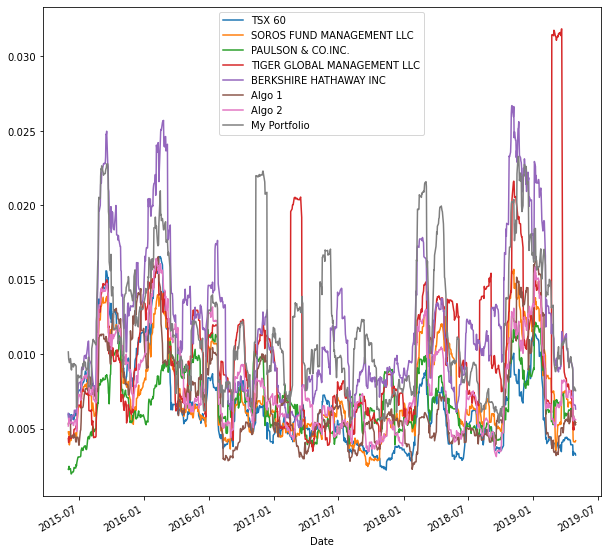

In [38]:
# Calculate rolling standard deviation
combined_std_21 = combined_df.rolling(window=21).std()
# Plot rolling standard deviation
combined_std_21.plot(figsize=(10,10))

### Calculate and plot the correlation

Covariance of my portfolio relative to TSX 60 is 0.00004619.
Variance of TSX 60 is 0.00005034.
Beta of my portfolio is 0.9174.


<AxesSubplot:>

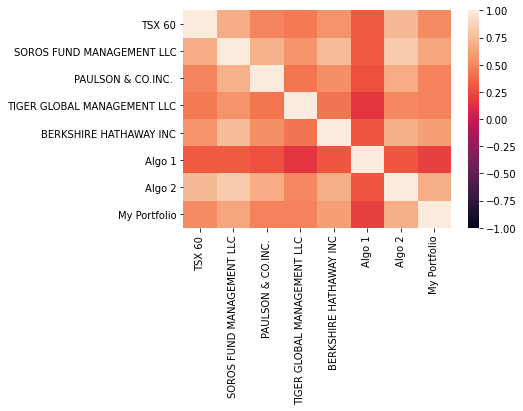

In [39]:
# Calculate and plot the correlation

# Calculate covariance of my portfolio
covariance_matrix = combined_df.cov()
# Get the covariance relative to TSX 60 only
myport_vs_tsx = covariance_matrix.loc['TSX 60']['My Portfolio']
print(f'Covariance of my portfolio relative to TSX 60 is {"{0:.8f}".format(myport_vs_tsx)}.')
# Calculate variance of S&P TSX
variance_tsx = combined_df['TSX 60'].var()
print(f'Variance of TSX 60 is {"{0:.8f}".format(variance_tsx)}.')
# Computing beta
myport_beta = myport_vs_tsx / variance_tsx
print(f'Beta of my portfolio is {"{0:.4f}".format(myport_beta)}.')

# Calculate the correlation
correlation = combined_df.corr()
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

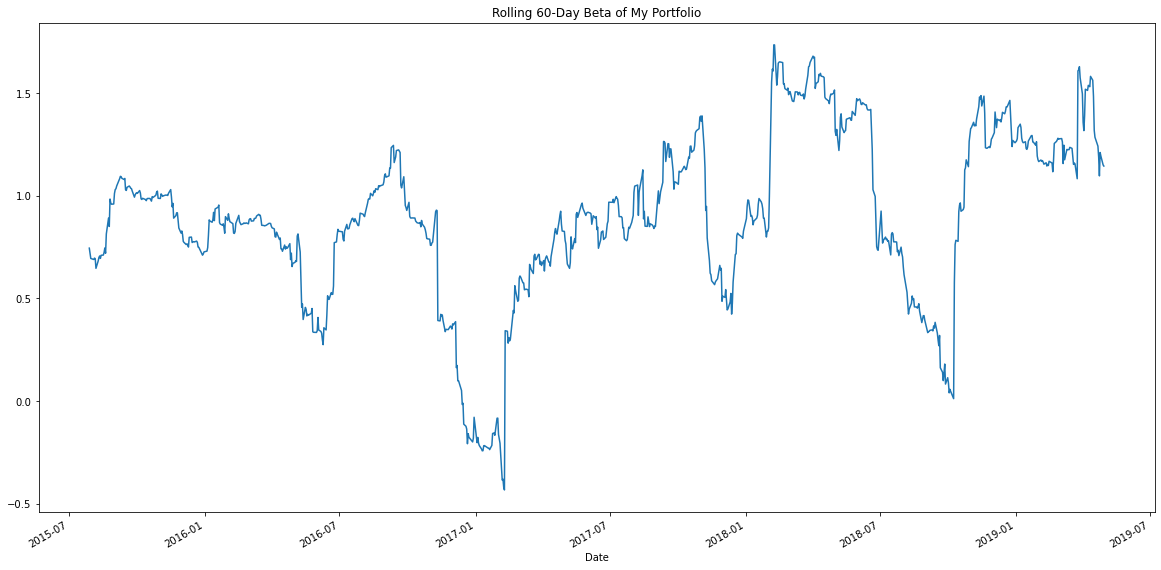

In [40]:
# Calculate and plot Beta
# Calculate 60-day rolling covariance of My Portfolio vs. TSX 60
rolling_covariance = combined_df["My Portfolio"].rolling(window=60).cov(combined_df["TSX 60"])
# Calculate 10-day rolling variance of TSX 60
rolling_variance = combined_df["TSX 60"].rolling(window=60).var()
# Calculate 10-day rolling beta of algo 1 and plot the data
rolling_beta = rolling_covariance / rolling_variance
ax = rolling_beta.plot(figsize=(20, 10), title="Rolling 60-Day Beta of My Portfolio")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [41]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios = ((combined_df.mean() * 252)-0.015) / (combined_df.std() * np.sqrt(252))


Text(0, 0.5, 'Sharpe Ratio')

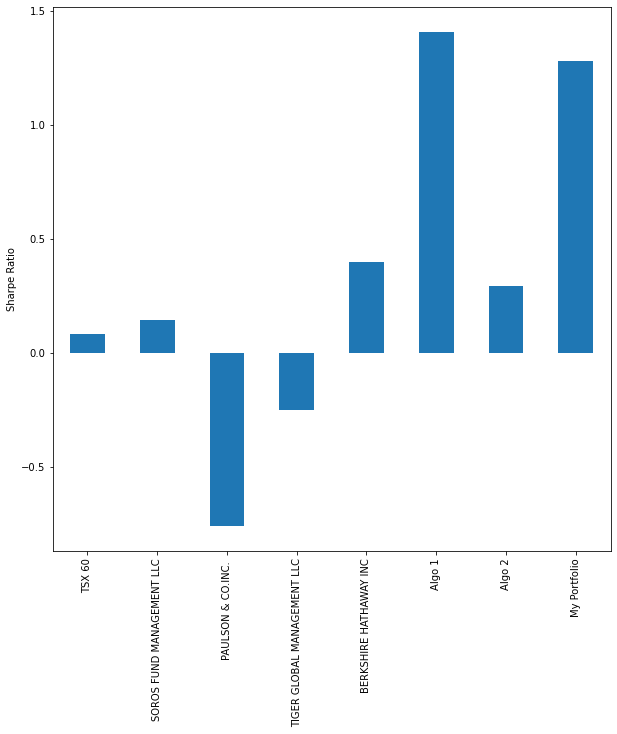

In [42]:
# Visualize the sharpe ratios as a bar plot
ax = sharpe_ratios.plot(kind='bar', figsize=(10,10))
ax.set_ylabel("Sharpe Ratio")

### How does your portfolio do?

Write your answer here!

## It is doing great.